### **Outlier Impact and Seasonal Revenue Analysis in Retail Data on UCI Online Retail Dataset.**

Dataset : UCI Online Retail II Dataset

Dataset summary.

The dataset contains transactions occurring between 01/12/2009 and 09/12/2011. for a UK-based online retail company. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The dataset contains 1067371 rows and 8 columns. The columns are as follows:

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
* Description: Product (item) name. Nominal. 
* Quantity: The quantities of each product (item) per transaction. Numeric.	
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
* Country: Country name. Nominal. The name of the country where a customer resides.

### Following is a brief detail of EDA file.
* Imported required libraries 
* Check basic information, columns, null values, datatypes.
* Did analysis on Invoice and Stock code columns.
* Cleaned the data and removed NAN values from customer ID.
* Performed Feature engineering on columns taken out a Total Sales column.
* Grouped data with Customer ID to get collective details of purchase.
* Plooted data and checked for outliers and removed them.
* Did the Recency, Frequency and Monetary check.
* Plotted the data with a scatter plot.
* Decided to apply KMeans clustering to segment the customers.
* Did elbow method and Sihoutte score analysis to get accurate no of clusters.
* Plotted the acquired clusters and RFM scores.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

#### Exploring Data

Checking basic info: 
- Dataset shape
- Column names
- Null values
- Data types

In [2]:
data = pd.read_excel("online_retail_II.xlsx", sheet_name=0)
data.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


#### There is some discrepancy on the Quantity and price hence analyzing about negative quantity and price

In [50]:
data.describe(include='O') # checking up for categorical data

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


#### Looking for NaN values in data

In [6]:
data[data["Customer ID"].isna()].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


#### Assesing values where quantity is a negative value.

In [7]:
data[data["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


#### The Invoice starting with 'C' states as cancelled. Matching strings having unusual Invoice code other than 6 digits.

In [ ]:
data["Invoice"] = data["Invoice"].astype("str")
data[data["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [10]:
data["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
data[data["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


#### Inspecting Stock codes column.

In [13]:
data["StockCode"] = data["StockCode"].astype("str")
data[
    (~data["StockCode"].str.match(r"^\d{5}$")) &
    (~data["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$"))]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

#### Values with a stock code DOT

In [14]:
data[data["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
#DCGS, D, DOT, C2, C3, BANK CHARGES or B, S, gift_XXX, PADS, SP1002

In [16]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### Data Cleaning

To ensure data quality, applied regular expression (regex) patterns to clean and validate the `InvoiceNo` and `StockCode` columns:

- **InvoiceNo**: Should contain only numeric values (possibly starting with a character like 'C' in case of cancellations).
  - We removed any invoice numbers that do not match the expected format.
  - Cancelled invoices (starting with 'C') were optionally excluded.

- **StockCode**: Should be alphanumeric (e.g., item codes).
  - Removed or flagged entries with suspicious codes (e.g., 'POST', 'BANK CHARGES', etc.)
  - Retained only valid 5-digit alphanumeric product codes using a regex like: `^[0-9]{5}[A-Za-z]*$`

These checks help remove invalid or non-product entries that might otherwise skew product-level or RFM-based analysis.

In [17]:
new_df = data.copy()

In [18]:
new_df["Invoice"] = new_df["Invoice"].astype("str")
mask = (
    new_df["Invoice"].str.match("^\\d{6}$") == True
)

new_df = new_df[mask]
new_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
new_df["StockCode"] = new_df["StockCode"].astype("str")

mask = (
    (new_df["StockCode"].str.match(r"^\d{5}$") == True)
    | (new_df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$") == True)
    | (new_df["StockCode"].str.match(r"^PADS$") == True)
)
new_df = new_df[mask]
new_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


#### Dropping NaN values from customer ID column
We do not wish to have values where there is no customer ID mentioned.

In [20]:
new_df.dropna(subset=["Customer ID"], inplace=True)

/tmp/ipykernel_156483/619952194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=["Customer ID"], inplace=True)


In [21]:
new_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


#### Checking for items having price equals to 0. Seems like these items could be free with some other items.

In [22]:
len(new_df[new_df["Price"] == 0])

28

#### Only taking values with price greater than 0

In [23]:
new_df = new_df[new_df["Price"]>0]

In [24]:
new_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [25]:
new_df["Price"].min()

np.float64(0.001)

#### Removed approximately 23 precent of data that was unnecessary.

In [26]:
len(new_df)/len(data)

0.7732429238325965

### Feature Engineering

In [27]:
new_df["SalesLineTotal"] = new_df["Quantity"] * new_df["Price"]
new_df

/tmp/ipykernel_156483/1006549382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["SalesLineTotal"] = new_df["Quantity"] * new_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


#### Grouping data according to cusromer ID to determine overall purchase by a specific customer.

In [28]:
agg_df = new_df.groupby(by="Customer ID", as_index=False).agg(
    MonetaryValue=("SalesLineTotal", "sum"),
    Frequency=("Invoice", "nunique"),
    LastInvoiceDate = ("InvoiceDate", "max")
)

agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


#### Taking out the latest date of purchase.

In [29]:
max_inv_date = agg_df["LastInvoiceDate"].max()
max_inv_date

Timestamp('2010-12-09 20:01:00')

#### Checking the recency of purchase done by customers.

In [30]:
agg_df["Recency"] = (max_inv_date - agg_df["LastInvoiceDate"]).dt.days
agg_df.head(4)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42


#### Plotting the distributions for MonetaryValues, Frequency Distribution and Recency Distribution

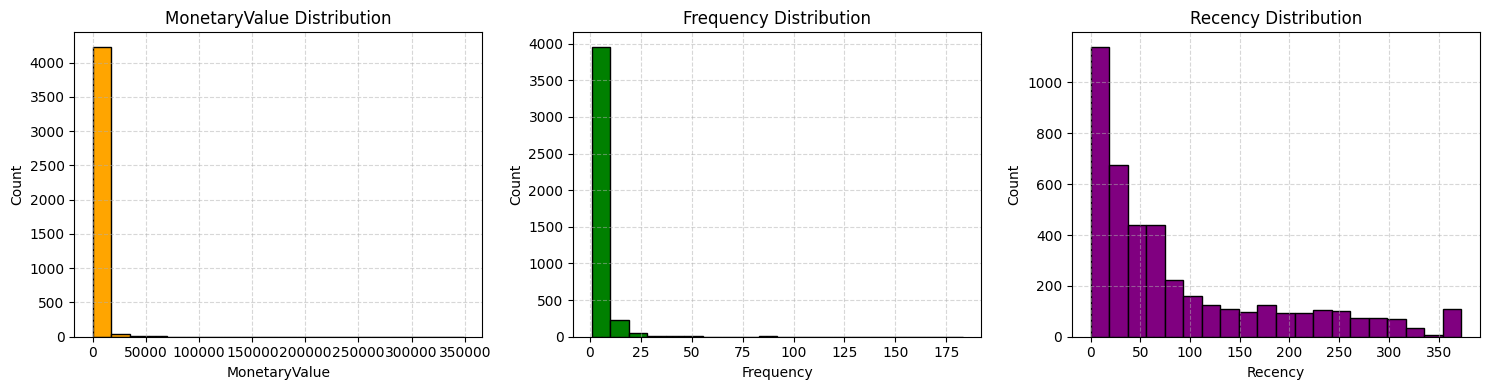

In [31]:
columns_to_plot = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['orange', 'green', 'purple']  
plt.figure(figsize=(15, 4))  

for i, (col, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(1, 3, i)
    plt.hist(agg_df[col], bins=20, color=color, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Plotting the Box plots to check for outlier identification.

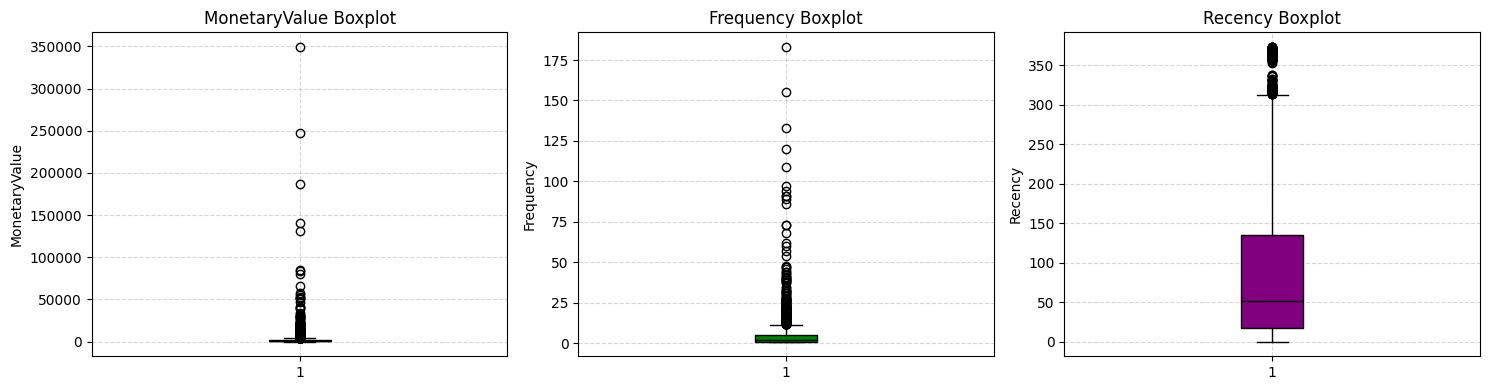

In [51]:
columns_to_plot = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['orange', 'green', 'purple']

plt.figure(figsize=(15, 4)) 

for i, (col, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(1, 3, i)
    plt.boxplot(agg_df[col], patch_artist=True,
                boxprops=dict(facecolor=color, color='black'),
                medianprops=dict(color='black'))
    plt.title(f'{col} Boxplot')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Carrying out the interquartile range analysis to get an accurate range of data acceptance and outlier detection.

In [33]:
M_q1 = agg_df["MonetaryValue"].quantile(0.25)
M_q3 = agg_df["MonetaryValue"].quantile(0.75)
M_iqr = M_q3 - M_q1

#### Monetary Value Outliers.

In [34]:
monetary_outliers_df = agg_df[
    (agg_df["MonetaryValue"] > (M_q3 + 1.5 * M_iqr)) |
    (agg_df["MonetaryValue"] < (M_q1 - 1.5 * M_iqr))
].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


#### Frequency Outliers.

In [35]:
F_q1 = agg_df["Frequency"].quantile(0.25)
F_q3 = agg_df["Frequency"].quantile(0.75)
F_iqr = F_q3 - F_q1


frequency_outliers_df = agg_df[
    (agg_df["Frequency"] > (F_q3 + 1.5 * F_iqr)) |
    (agg_df["Frequency"] < (F_q1 - 1.5 * F_iqr))
].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


#### Recency Outliers

In [36]:
R_q1 = agg_df["Recency"].quantile(0.25)
R_q3 = agg_df["Recency"].quantile(0.75)
R_iqr = R_q3 - R_q1

recency_outliers_df = agg_df[
    (agg_df["Recency"] > (R_q3 + 1.5 * R_iqr)) |
    (agg_df["Recency"] < (R_q1 - 1.5 * R_iqr))
].copy()

recency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000000,167.000000,167.000000,167,167.000000
mean,15429.029940,418.318868,1.251497,2009-12-23 13:52:27.664670720,350.970060
min,12439.000000,2.950000,1.000000,2009-12-01 10:49:00,314.000000
25%,14115.500000,147.350000,1.000000,2009-12-07 13:03:00,328.500000
50%,15413.000000,231.900000,1.000000,2009-12-14 15:07:00,360.000000
75%,16812.000000,356.175000,1.000000,2010-01-14 23:56:00,367.000000
max,18201.000000,9471.500000,7.000000,2010-01-29 14:22:00,373.000000
std,1629.838337,950.151329,0.796971,NaN,20.513124


#### Removing outliers and assessing the range

In [37]:
non_outliers_df = agg_df[(~agg_df.index.isin(monetary_outliers_df.index)) & (~agg_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


#### Plotting  box plots after removing outliers

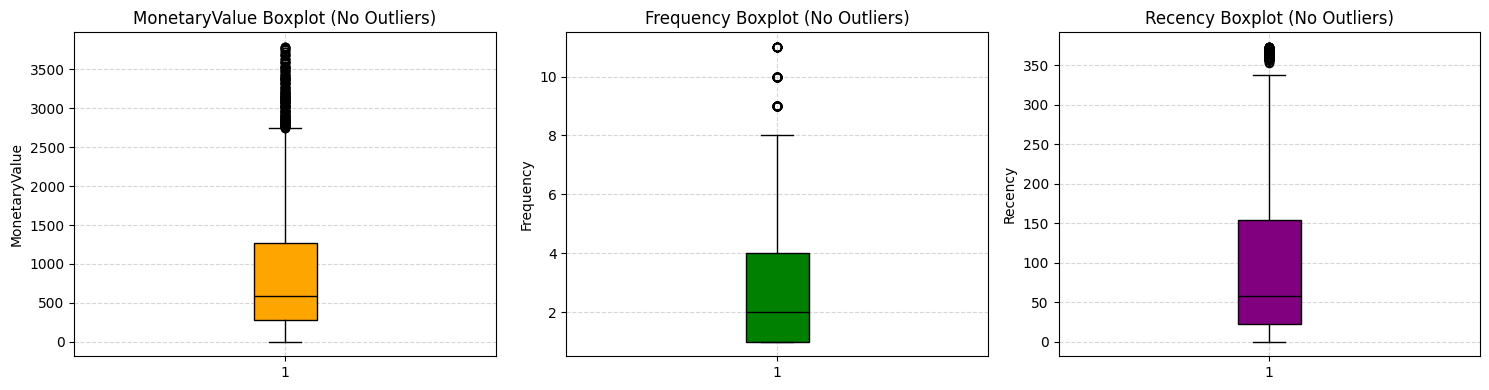

In [38]:
columns_to_plot = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['orange', 'green', 'purple']

plt.figure(figsize=(15, 4))

for i, (col, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(1, 3, i)
    plt.boxplot(non_outliers_df[col], patch_artist=True,
                boxprops=dict(facecolor=color, color='black'),
                medianprops=dict(color='black'))
    plt.title(f'{col} Boxplot (No Outliers)')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### Plotting scatter plot for the cleaned data after removing outliers.

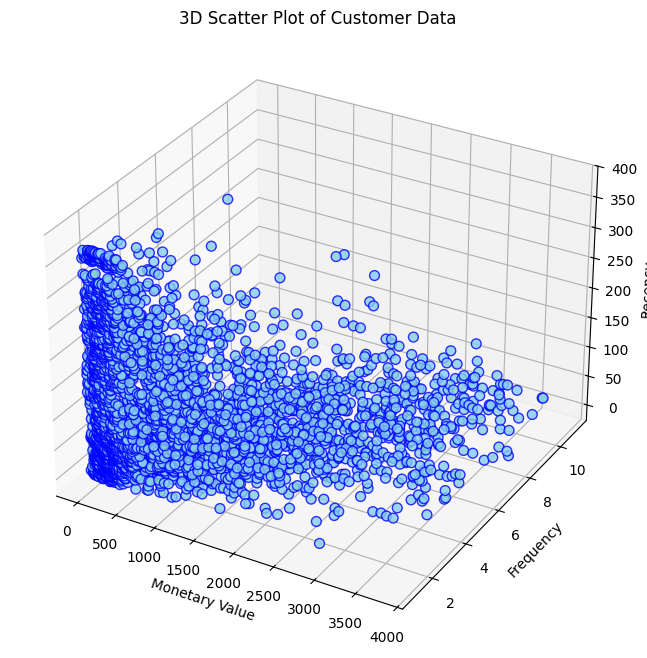

In [39]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"],
    c='skyblue',  
    edgecolors='blue',
    s=50,  
    alpha=0.8
)

# Labels and title
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

#### Observed that the scales are not aligned and there is a mismatch. Applying standard scaler to keep all data in a specified range.

In [41]:
scaler = StandardScaler()

features = ["MonetaryValue", "Frequency", "Recency"]
scaled_data = scaler.fit_transform(non_outliers_df[features])

scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=features)

scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


#### Plotting the scaled data.

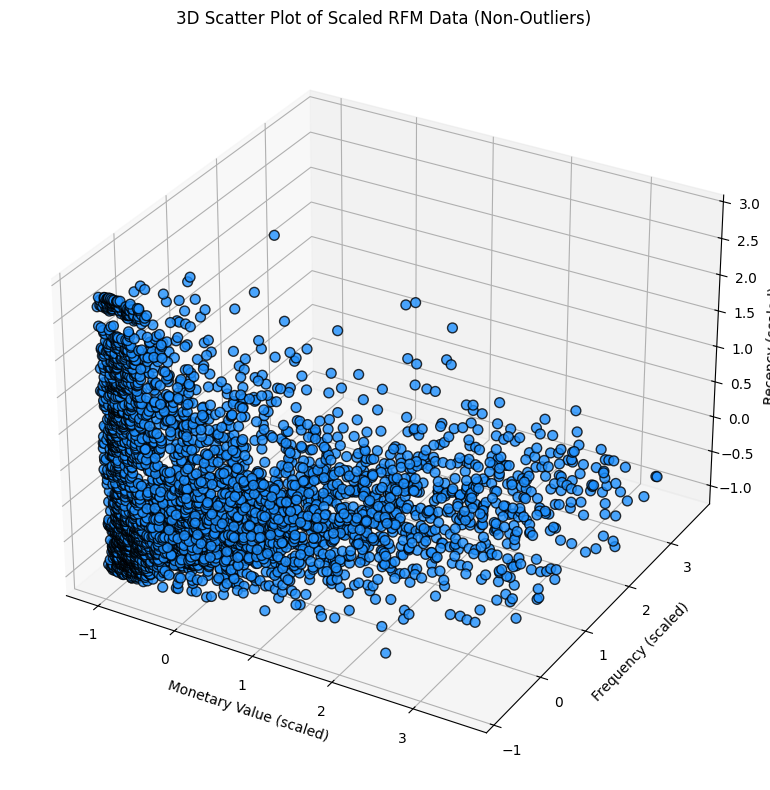

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    scaled_data_df["MonetaryValue"],
    scaled_data_df["Frequency"],
    scaled_data_df["Recency"],
    c='dodgerblue', 
    s=50,
    edgecolors='black',
    alpha=0.8
)

# Axis labels and title
ax.set_xlabel('Monetary Value (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Recency (scaled)')
ax.set_title('3D Scatter Plot of Scaled RFM Data (Non-Outliers)')

plt.tight_layout()
plt.show()

### KMeans Clustering

* Initializing K random centroids.
* Assigning each data point to the nearest centroid (based on distance).
* Recalculating centroids as the mean of assigned points.
* Repeating steps 2–3 until centroids stop changing (convergence).

#### Detrmining the optimum number of clusters using the Elbow method and Sihoutte score to get a perfect number of cluster to be distinguished.

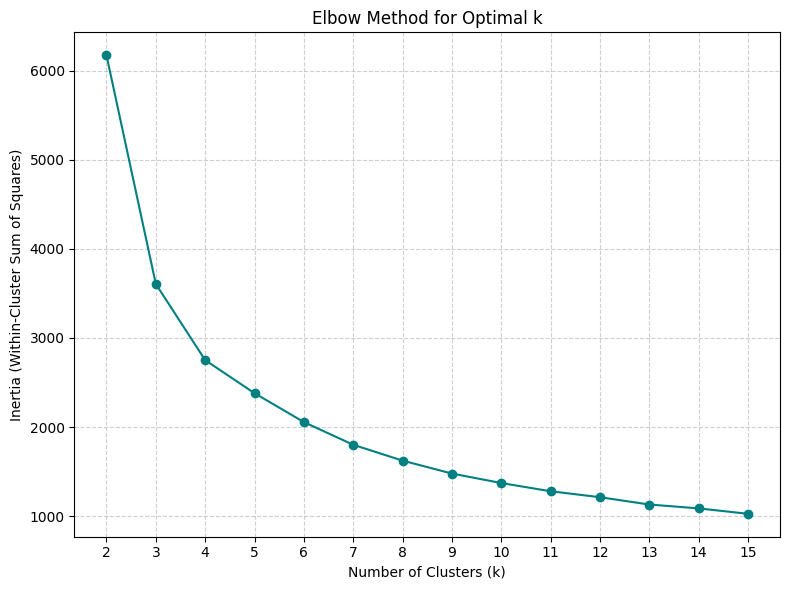

In [52]:
max_k = 15
inertia = []
k_vals = range(2, max_k + 1)

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=19, max_iter=1000, n_init=10)
    kmeans.fit(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_vals, inertia, marker='o', linestyle='-', color='teal')
plt.xticks(k_vals)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Determining Silhouette Score

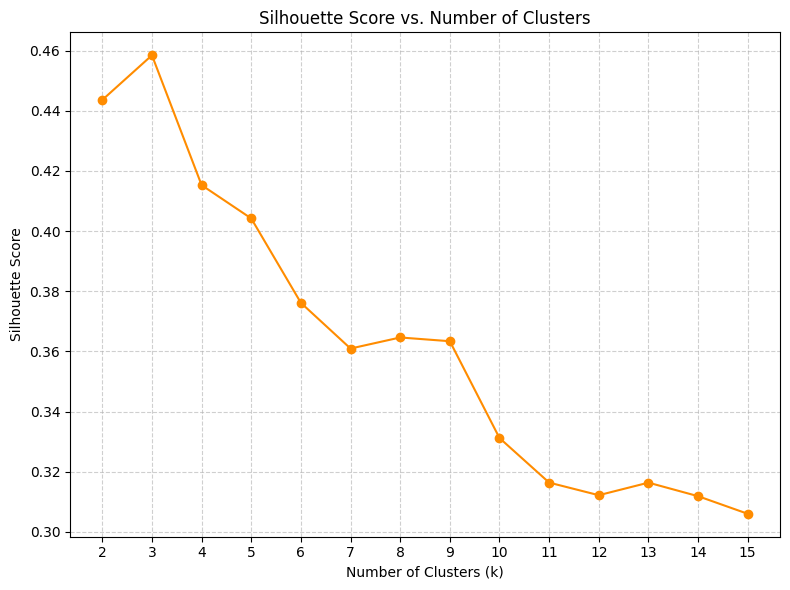

In [53]:
max_k = 15
k_vals = range(2, max_k + 1)

silhouette_scores = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=19, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 6))
plt.plot(k_vals, silhouette_scores, marker='o', color='darkorange')
plt.xticks(k_vals)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Came to a conclusion that K = 4 is the optimum cluster choice for the analysis.

In [54]:
kmeans = KMeans(n_clusters=4, random_state=45, max_iter=1200)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 3, 1, ..., 2, 3, 3], shape=(3809,), dtype=int32)

#### Assigning cluster number to the clusters and adding the column for it.

In [55]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df.head()

/tmp/ipykernel_156483/760032900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,2
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1


#### Specifying the clusters and demonstrating a scatter plot visalization to display the results.

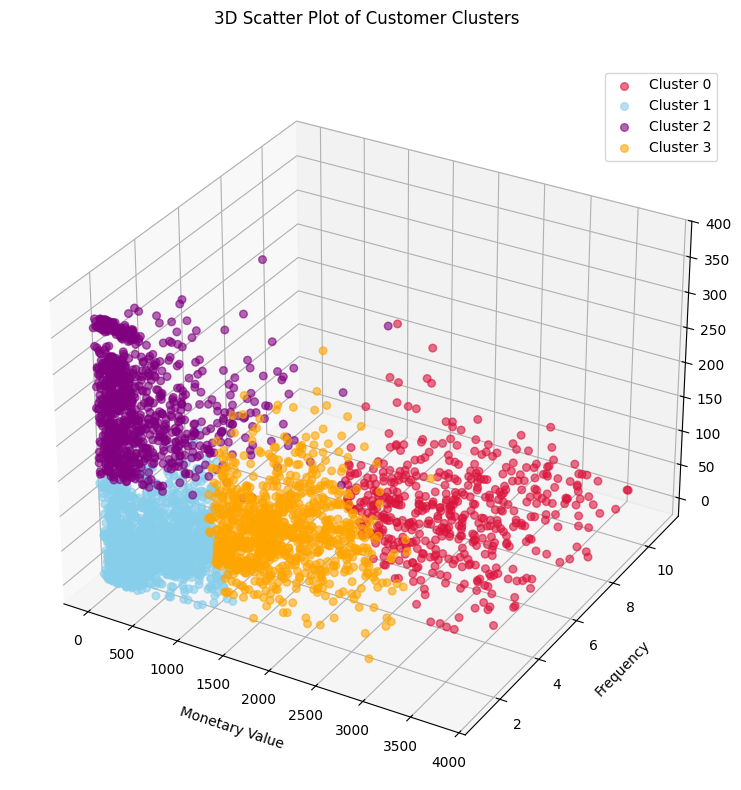

In [56]:
cluster_colors = ['crimson', 'skyblue', 'purple', 'orange']

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Number of clusters (assuming 0 to 3)
for cluster_id in range(4):
    cluster_data = non_outliers_df[non_outliers_df["Cluster"] == cluster_id]
    ax.scatter(
        cluster_data["MonetaryValue"],
        cluster_data["Frequency"],
        cluster_data["Recency"],
        label=f'Cluster {cluster_id}',
        color=cluster_colors[cluster_id],
        s=30,
        alpha=0.6)

# Axis labels and title
ax.set_xlabel("Monetary Value", labelpad=10)
ax.set_ylabel("Frequency", labelpad=10)
ax.set_zlabel("Recency", labelpad=10)
ax.set_title("3D Scatter Plot of Customer Clusters", pad=30)
ax.legend()
plt.tight_layout()
plt.show()

### Below is the conclusion for the acquired clusters.


**Cluster 0 (Red):**

* **High Frequency**, **High Monetary Value**, **Low Recency**
* Best Customers / Loyal Customers
* These are highly engaged customers who buy often, spend a lot, and have purchased recently.
* **Action:** Focus on retaining them with loyalty programs, exclusive offers, and early access to new products.


**Cluster 1 (Sky Blue):**

* **Low Frequency**, **Low Monetary Value**, **Moderate Recency**
* Low-Value or Occasional Buyers
* These customers make occasional purchases and spend less.
* **Action:** Encourage them with entry-level discounts, promotional offers, or bundling deals.


**Cluster 2 (Purple):**

* **Low Frequency**, **Low Monetary Value**, **High Recency**
* Lost or Churned Customers
* These are inactive users who haven't purchased recently and also spent less when they did.
* **Action:** Re-engage them with win-back campaigns, limited-time offers, or personalized emails.

**Cluster 3 (Orange):**

* **Moderate Frequency**, **Moderate Monetary Value**, **Moderate Recency**
* Potential Loyalists
* These customers show promising behavior but need more engagement to become loyal.
* **Action:** Nurture them with personalized product suggestions, reward points, and follow-up emails.



#### Group the clusters and calculate mean RFM values

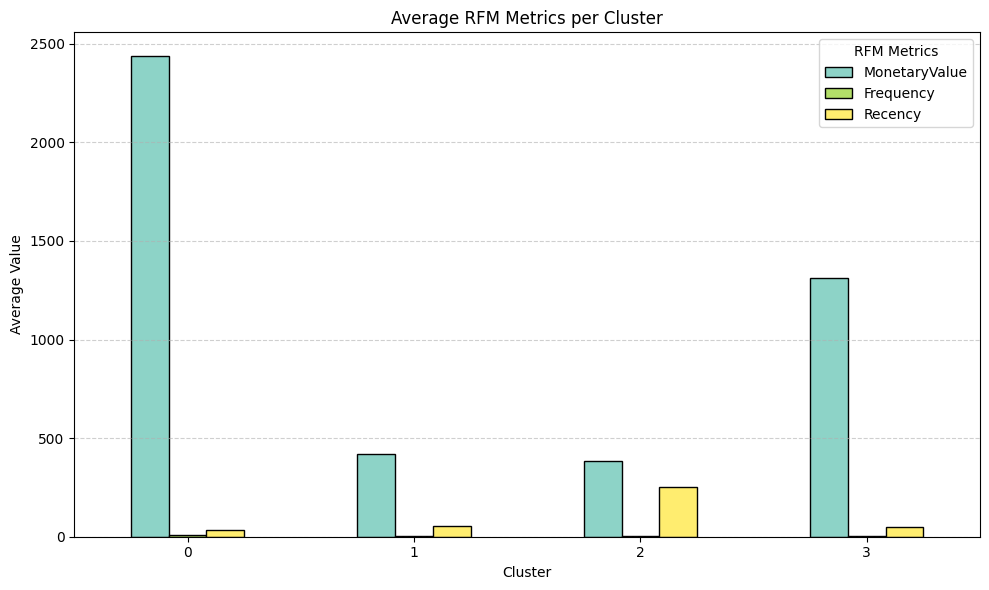

In [ ]:
rfm_means = non_outliers_df.groupby("Cluster")[["MonetaryValue", "Frequency", "Recency"]].mean()
rfm_means.plot(kind='bar', figsize=(10, 6), colormap='Set3', edgecolor='black')

plt.title("Average RFM Metrics per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="RFM Metrics")
plt.tight_layout()
plt.show()